<a href="https://colab.research.google.com/github/jonahsjlee/Git-Hub-Intro/blob/main/API_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
#get stock from the user
stocks=input("Enter a stock using the Ticker symbol: ")

Enter a stock using the Ticker symbol: AAPL


In [ ]:
apikey="c9OFL7lPUH8t7UYyTwOyK1K4aokTumjg2BqWVGp7"

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stocks}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

In [ ]:
url_trendingData = "https://yfapi.net/v1/finance/trending/US"

querystring_trendingData = {}

headers = {
    'x-api-key': apikey
    }
response_trendingData = requests.request("GET", url_trendingData, headers=headers, params=querystring_trendingData)


In [ ]:
#print the company name and price
stock_json = response.json()
trending_json = response_trendingData.json()

# validate and extract data
try:
    quotes = trending_json['finance']['result'][0]['quotes']
    five_trending_stocks = [quote['symbol'] for quote in quotes[:5]]
except (KeyError, IndexError):
    five_trending_stocks = []
    print("Warning: Could not fetch trending stocks.")


stock_data = []
# check if expected data exists
if 'quoteResponse' in stock_json and 'result' in stock_json['quoteResponse']:
    for stock in stock_json['quoteResponse']['result']:
        stock_info = {
            "Ticker Name": stocks,
            "Company Name": stock.get('longName', 'N/A'),
            "Current Market Price": stock.get('regularMarketPrice', 'N/A'),
            "Target Mean Price": stock['forwardPE'] * stock['epsForward'] if 'forwardPE' in stock and 'epsForward' in stock else 'N/A',
            "52 Week High": stock.get('fiftyTwoWeekHigh', 'N/A'),
            "52 Week Low": stock.get('fiftyTwoWeekLow', 'N/A'),
            "5 Trending Stocks": five_trending_stocks
        }
        stock_data.append(stock_info)
else:
    print("No valid stock data available.")

# ensure stock_data is not empty
if stock_data:
    df = pd.DataFrame(stock_data)
    print(df)
    df.to_csv('api_hw.csv', index=False)
else:
    print("No data to save or display.")


  Ticker Name Company Name  Current Market Price  Target Mean Price  \
0        AAPL   Apple Inc.                227.81          227.80999   

   52 Week High  52 Week Low              5 Trending Stocks  
0        237.23       164.08  [NIO, IONQ, RKLB, LULU, COST]  


In [ ]:
url_bonus = "https://yfapi.net/v8/finance/spark"

querystring_bonus = {"symbols":stocks}

headers = {
    'x-api-key': apikey
    }
response_bonus = requests.request("GET", url_bonus, headers=headers, params=querystring_bonus)

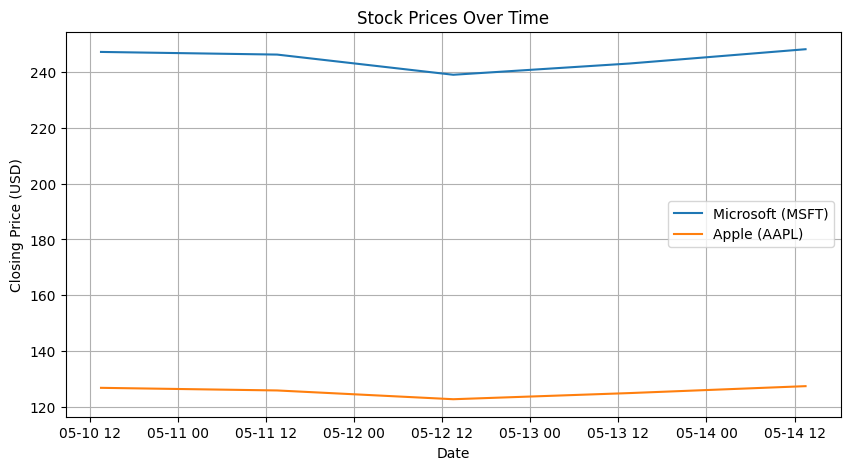

In [ ]:
bonus_json = response_bonus.json()

def create_stock_df(stock_data):
    timestamps = stock_data['timestamp']
    closes = stock_data['close']
    dates = pd.to_datetime(timestamps, unit='s')
    return pd.DataFrame({'Date': dates, 'Close': closes})

msft_df = create_stock_df(data['MSFT'])
aapl_df = create_stock_df(data['AAPL'])

plt.figure(figsize=(10, 5))
plt.plot(msft_df['Date'], msft_df['Close'], label='Microsoft (MSFT)')
plt.plot(aapl_df['Date'], aapl_df['Close'], label='Apple (AAPL)')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()